In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv(r"C:\Users\elama\OneDrive\Documents\MachineLearning/94_character_TMNIST.csv")

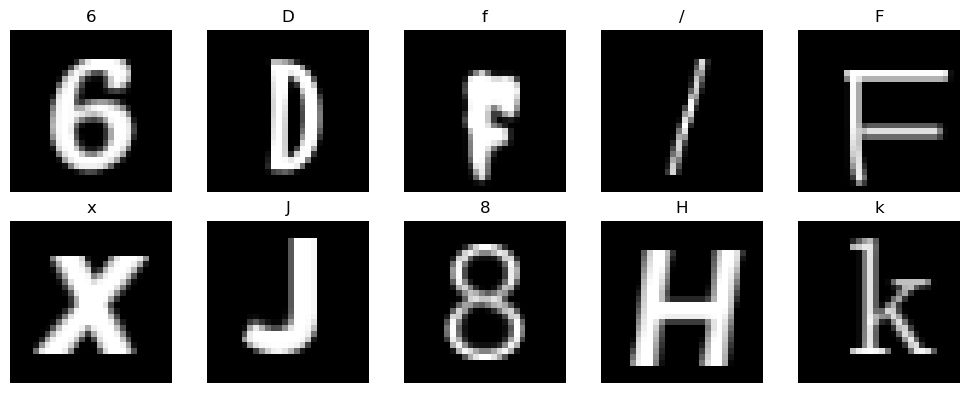

In [5]:
head = data.head(10)

plt.figure(figsize=(10, 4))
for i in range(10):
    pixels = head.iloc[i, 2:].values.astype(np.uint8).reshape((28, 28))
    
    label = head.iloc[i, 1]
    font_name = head.iloc[i, 0]
    
    plt.subplot(2, 5, i+1)
    plt.imshow(pixels, cmap='gray')
    plt.title(f"{label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
X = data.iloc[:, 2:].values / 255.0  # Normalizing features
y = data['labels'].values  # Extracting labels

# Encode labels to numeric values
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Initialize weights, bias, and learning rate
num_features = X_train.shape[1]
num_classes = len(np.unique(y_numeric))
weights = np.random.randn(num_features, num_classes)  # Initialize weights randomly
bias = np.zeros(num_classes)  # Initialize bias to zeros
learning_rate = 0.01  # Set learning rate

# Activation function (sigmoid)
def activation(z):
    return 1 / (1 + np.exp(-z))

# Training loop
for epoch in range(20):  # Run for 20 epochs
    for i in range(X_train.shape[0]):
        z = np.dot(X_train[i], weights) + bias  # Linear combination of inputs and weights
        y_pred = activation(z)  # Apply activation function
        
        # Convert predicted probabilities to the predicted class (argmax)
        y_pred_class = np.argmax(y_pred)
        
        # If the predicted class is not equal to the true class, update weights
        if y_pred_class != y_train[i]:
            # Update weights for the true class
            weights[:, y_train[i]] += learning_rate * X_train[i]
            # Subtract from the weights of the predicted (incorrect) class
            weights[:, y_pred_class] -= learning_rate * X_train[i]

# Prediction on test data
z_test = np.dot(X_test, weights) + bias
y_test_pred = activation(z_test)

# Convert predictions to class labels
y_test_pred_class = np.argmax(y_test_pred, axis=1)

# Calculate accuracy
accuracy = np.mean(y_test_pred_class == y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

Test accuracy: 80.36%


In [11]:
# Convert probabilities to predicted class labels
y_test_pred_class = np.argmax(y_test_pred, axis=1)

# Now you can use the confusion matrix and classification report
cm = confusion_matrix(y_test, y_test_pred_class)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_test_pred_class, target_names=label_encoder.classes_))

Confusion Matrix:
[[551   0   0 ...   4   0   0]
 [  0 503   1 ...   0   0   0]
 [  0   1 550 ...   0   0   0]
 ...
 [  8   0   0 ... 529   0   0]
 [  3   0   0 ...   1 564   0]
 [  0   0   3 ...   0   0 554]]
Classification Report:
              precision    recall  f1-score   support

           !       0.83      0.92      0.87       602
           "       0.90      0.90      0.90       556
           #       0.91      0.95      0.93       579
           $       0.94      0.90      0.92       583
           %       0.95      0.90      0.92       617
           &       0.93      0.85      0.89       566
           '       0.86      0.32      0.47       617
           (       0.97      0.88      0.92       587
           )       0.96      0.87      0.91       591
           *       0.74      0.92      0.82       624
           +       0.95      0.96      0.95       626
           ,       0.51      0.95      0.67       583
           -       0.72      0.91      0.80       634
          

In [13]:
# Convert predicted probabilities to class labels
y_test_pred_class = np.argmax(y_test_pred, axis=1)

# Now you can apply inverse_transform to get the actual labels
y_test_actual_labels = label_encoder.inverse_transform(y_test)
y_test_pred_labels = label_encoder.inverse_transform(y_test_pred_class)

# Create a DataFrame to compare actual and predicted labels
results_df = pd.DataFrame({
    'Actual': y_test_actual_labels,
    'Predicted': y_test_pred_labels,
    'Correct': y_test_actual_labels == y_test_pred_labels
})

print(results_df.head(10))


  Actual Predicted  Correct
0      &         &     True
1      '         '     True
2      i         i     True
3      v         V    False
4      /         /     True
5      _         _     True
6      S         t    False
7      g         ,    False
8      ,         ,     True
9      h         H    False


In [14]:
np.savez('perceptron_model_weights.npz', weights=weights, bias=bias)